In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import qbo_utils as qbo
from CASutils import colorbar_utils as cbars

In [9]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/SUPP/"

In [3]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/QBOcomposites/monthly/"

In [4]:
l83=[]
for imem in np.arange(0,3,1):
    memstr=str(imem+1).zfill(3)
    dat = xr.open_dataset(basepath+'L83_FHIST_'+memstr+'_composite_50hpa.nc')
    l83.append(dat)
l83=xr.concat(l83, dim='M')
l83_em = l83.mean('M')

In [5]:
fwhist=[]
for imem in np.arange(0,3,1):
    memstr=str(imem+1).zfill(3)
    dat = xr.open_dataset(basepath+'FWHIST_'+memstr+'_composite_50hpa.nc')
    fwhist.append(dat)
fwhist = xr.concat(fwhist, dim='M')
fwhist_em = fwhist.mean('M')

In [6]:
dz1000 = xr.open_dataset(basepath+'dz1000_composite_50hpa.nc')

[-60. -56. -52. -48. -44. -40. -36. -32. -28. -24. -20. -16. -12.  -8.
  -4.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.]
[-0.6  -0.55 -0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05
  0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6 ]


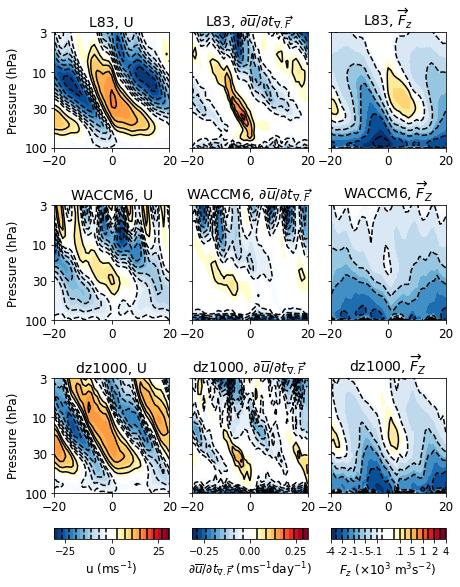

In [14]:
fig = plt.figure(figsize=(16,16))

ax = qbo.plotqbowinds(fig, l83_em.uzm, l83_em.time, l83_em.ilev,2,-30,30,'L83, U',0.17,0.27,0.7,0.8,plevvar='ilev', contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*l83_em.utendepfd, l83_em.time, l83_em.ilev,0.025,-0.3,0.3,'L83, $\partial\overline{u}/\partial t_{\\nabla.\overrightarrow{F}}$',
                      0.29,0.39,0.7,0.8,plevvar='ilev', contourlines=True, contourlinescale=2, ylabel=False)
clevs=[-4000,-3000,-2000,-1500,-1000,-750,-500,-250,-100,-50,0,
       50,100,250,500,750,1000,1500,2000,3000,4000]
ax = qbo.plotqbowinds(fig, l83_em.epfz, l83_em.time, l83_em.ilev, 0.1, -1, 1, 'L83, $\overrightarrow{F}_{z}$',0.41,0.51,0.7,0.8,plevvar='ilev', 
                      speclevs=clevs, contourlines=True, contourlinescale=2, ylabel=False)


ax = qbo.plotqbowinds(fig, fwhist_em.uzm, fwhist_em.time, fwhist_em.ilev,2,-30,30,'WACCM6, U',0.17,0.27,0.55,0.65,plevvar='ilev', contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*fwhist_em.utendepfd, fwhist_em.time, fwhist_em.ilev,0.025,-0.3,0.3,'WACCM6, $\partial \overline{u}/\partial t_{\\nabla.\overrightarrow{F}}$',0.29,0.39,0.55,0.65,
                      plevvar='ilev', contourlines=True, contourlinescale=2, ylabel=False)
ax = qbo.plotqbowinds(fig, fwhist_em.epfz, fwhist_em.time, fwhist_em.ilev,0.1,-1,1,'WACCM6, $\overrightarrow{F}_{Z}$',0.41,0.51,0.55,0.65,
                      plevvar='ilev', speclevs=clevs, contourlines=True, contourlinescale=2, ylabel=False)

ax = qbo.plotqbowinds(fig, dz1000.uzm, dz1000.time, dz1000.ilev, 2, -30, 30, 'dz1000, U', 0.17,0.27,0.4,0.5, plevvar='ilev', contourlines=True, contourlinescale=2)
ax = qbo.plotqbowinds(fig, 86400.*dz1000.utendepfd, dz1000.time, dz1000.ilev, 0.025,-0.3,0.3,'dz1000, $\partial \overline{u}/\partial t_{\\nabla.\overrightarrow{F}}$', 0.29,0.39,0.4,0.5, plevvar='ilev',
                      contourlines=True, contourlinescale=2, ylabel=False)
ax = qbo.plotqbowinds(fig, dz1000.epfz, dz1000.time, dz1000.ilev, 0.1, -1, 1, 'dz1000, $\overrightarrow{F}_{Z}$', 0.41,0.51,0.4,0.5,
                      plevvar='ilev', speclevs=clevs, contourlines=True, contourlinescale=2, ylabel=False)

ax = cbars.plotcolorbar(fig, 2, -30, 30, 'u (ms$^{-1}$)', 0.17,0.27,0.36,0.37, contourlines=True, contourlinescale=2, fsize=10)
ax = cbars.plotcolorbar(fig, 0.025,-0.3,0.3,r'$\partial \overline{u}/\partial t_{\nabla.\overrightarrow{F}}$ (ms$^{-1}$day$^{-1}}$)',0.29,0.39,0.36,0.37,contourlines=True, contourlinescale=2, fsize=10)
ax = cbars.plotcolorbar_sayc(fig, clevs, '$F_{z}$ ($\\times$10$^{3}$ m$^{3}$s$^{-2}$)',0.41,0.51,0.36,0.37, contourlines=True,
                            ticks=[-4000,-2000,-1000,-500,-100,100,500,1000,2000,4000], 
                            ticklabels=['-4','-2','-1','-.5','-.1','.1','.5','1','2','4'], fsize=10)

fig.savefig(plotpath+'figS10.pdf', bbox_inches='tight', facecolor='white')